In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 8)

sample_rate = 44100

def p(a):
    return IPython.display.Audio( a, rate=sample_rate, autoplay = True )

Populating the interactive namespace from numpy and matplotlib


In [85]:
def sinBuf( freq ):
    n = (int)( sample_rate / 10.0 )
    t = np.linspace( 0, n-1, n ) / sample_rate
    return np.sin( t * 2 * np.pi * freq)
    
def bufMag( buf ):
    rms = np.sqrt(np.mean(np.multiply( buf, buf )))
    return rms

In [86]:
class APF:
    def __init__(self, zR, zI ):
        self.om1 = 0
        self.om2 = 0
        self.im1 = 0
        self.im2 = 0
        self.zR = zR
        self.zI = zI
        self.mz2 = zR * zR + zI * zI
        
    def process( self, inp ):
        out = 0;
        
        out = ( self.mz2 * ( inp - self.om2 ) 
               - 2 * self.zR * ( self.im1 - self.om1 ) 
               + self.im2 )
        
        self.om2 = self.om1
        self.om1 = out
        
        self.im2 = self.im1
        self.im1 = inp
        
        return out
    

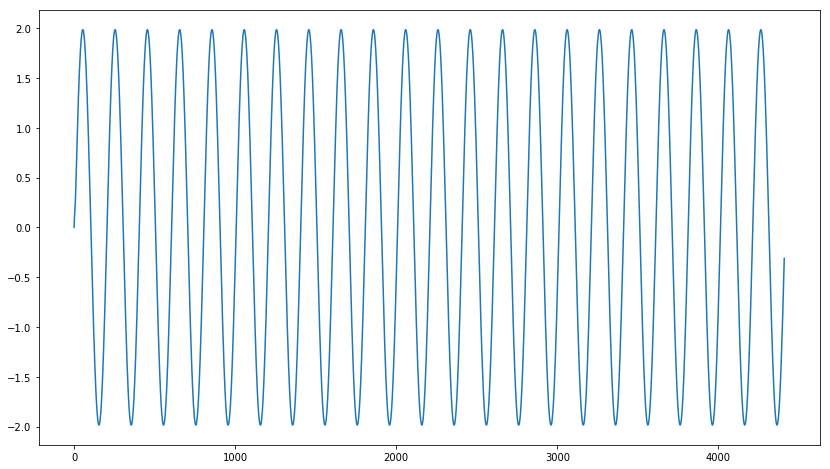

In [87]:
a = APF( 0.8, 0.2 )
r = [ a.process( x ) for x in sinBuf( 220 ) ]
plt.plot( r + sinBuf( 220 ) )

In [88]:
print( bufMag( r ), bufMag( sinBuf( 220 ) ) )

0.7070683706442422 0.7071067811865476


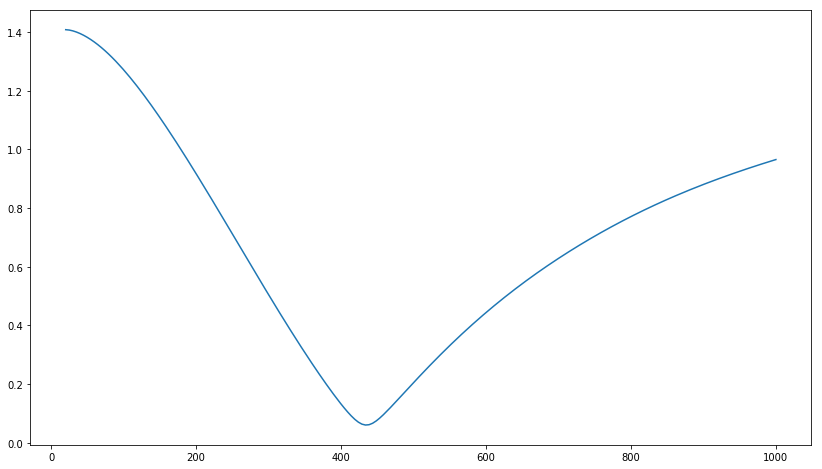

In [103]:
# OK so lets do a scan
def rmsAtF( freq ):
    a = APF( 0.94, 0.0 )
    s = sinBuf( freq )
    r = [ a.process( x ) for x in s ]
    return  bufMag( s + r )

freqT = np.linspace( 20, 1000, 200 )
res = [ rmsAtF( f ) for f in freqT ]
plt.plot( freqT, res )

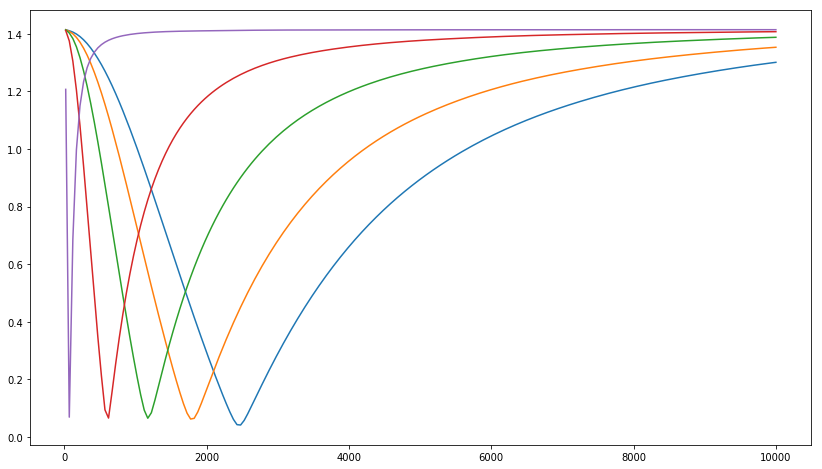

In [90]:
def rmsAtFWithA( a, freq ):
    s = sinBuf( freq )
    r = [ a.process( x ) for x in s ]
    return bufMag( s + r )


def scanForP( zr, zi ):
    a = APF( zr, zi )
    freqT = np.linspace( 20, 10000, 200 )
    res = [ rmsAtFWithA( a, f ) for f in freqT ]
    return [ freqT, res ];

for r in np.linspace( 0.7, 0.99, 5 ):
    d = scanForP( r, 0.0 )
    plt.plot( d[ 0 ], d[ 1 ] )



theta=0.000000
theta=0.157080
theta=0.314159
theta=0.471239
theta=0.628319
theta=0.785398
theta=0.942478
theta=1.099557
theta=1.256637
theta=1.413717
theta=1.570796


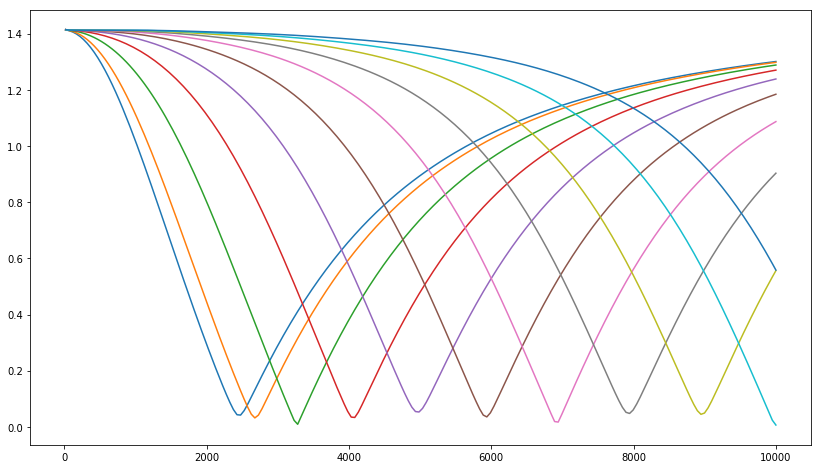

In [100]:
for th in np.linspace( 0,  0.5 * np.pi, 11 ):
    print( "theta=%lf" % (th))
    d = scanForP( 0.7 * cos( th ), 0.7 * sin( th ) )
    plt.plot( d[ 0 ], d[ 1 ] )
    

And so from those two plots we can conclude the following

* the magnitude of the real part controls the width of the filter. 0.99 is tight, 0.7 is fat
* the angle (between 0 and pi/2 basically - we can stay in that Q1) controls the filter position